In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data 

df=pd.read_csv("ppp.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
# dealing with missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [5]:
#describing data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='R&D Spend'>

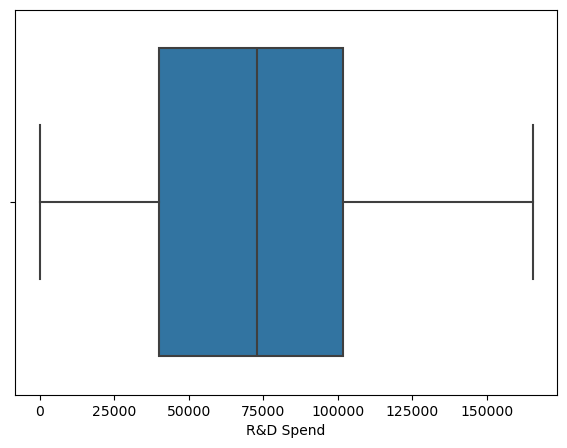

In [6]:
#exploratory data analysis
fig=plt.figure(figsize=(7,5))
sns.boxplot(data=df,x="R&D Spend")

C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Administration'>

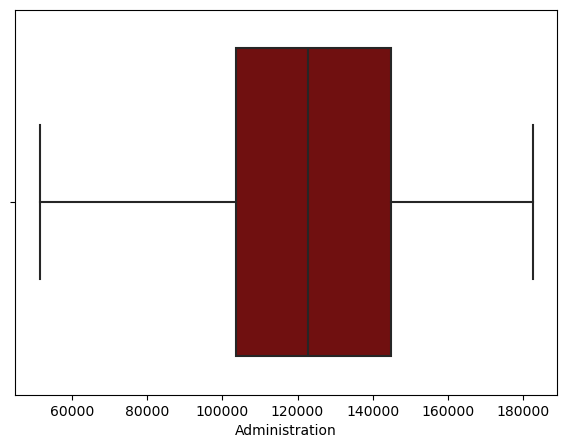

In [7]:
fig=plt.figure(figsize=(7,5))
sns.boxplot(data=df,x="Administration",color='#800000')

C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Marketing Spend'>

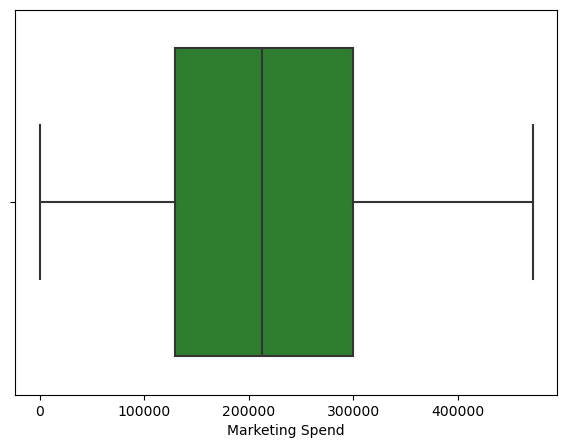

In [8]:
fig=plt.figure(figsize=(7,5))
sns.boxplot(data=df,x="Marketing Spend",color='#228B22')

<Axes: >

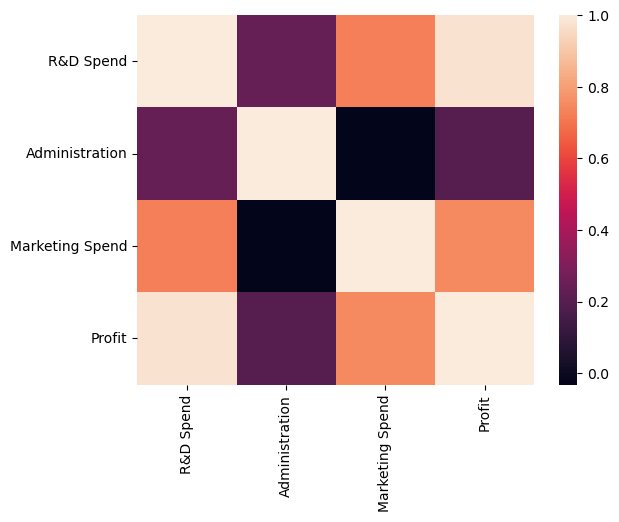

In [9]:
sns.heatmap(df.corr())

# splitting the data

In [10]:
from sklearn.model_selection import train_test_split
x=df.iloc[0:,0:3]
y=df.iloc[0:,3]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

# decision tree regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()


In [13]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
dtr.score(x_train, y_train)

1.0

In [15]:
#predicting results
y_pred=dtr.predict(x_test)

In [16]:
arr=np.concatenate((y_test.values.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1)
arr

array([[134307.35, 144259.4 ],
       [ 81005.76,  96479.51],
       [ 99937.59,  97483.56],
       [ 64926.08,  49490.75],
       [125370.37, 124266.9 ],
       [ 35673.41,  42559.73],
       [105733.54, 108552.04],
       [107404.34, 101004.64],
       [ 97427.84, 101004.64],
       [122776.86, 144259.4 ],
       [141585.52, 144259.4 ],
       [166187.94, 156991.12],
       [ 89949.14,  96479.51],
       [152211.77, 124266.9 ],
       [182901.99, 156991.12]])

In [17]:
com=pd.DataFrame({"Actual":y_test.values,"Predict":y_pred})

In [18]:
com

,Actual,Predict
0,134307.35,144259.40
1,81005.76,96479.51
2,99937.59,97483.56
3,64926.08,49490.75
4,125370.37,124266.90
5,35673.41,42559.73
6,105733.54,108552.04
7,107404.34,101004.64
8,97427.84,101004.64
9,122776.86,144259.40


C:\Users\91630\AppData\Local\Temp\ipykernel_1552\3655587692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(com["Actual"],color='r',hist=False)
C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

<Axes: xlabel='Predict', ylabel='Density'>

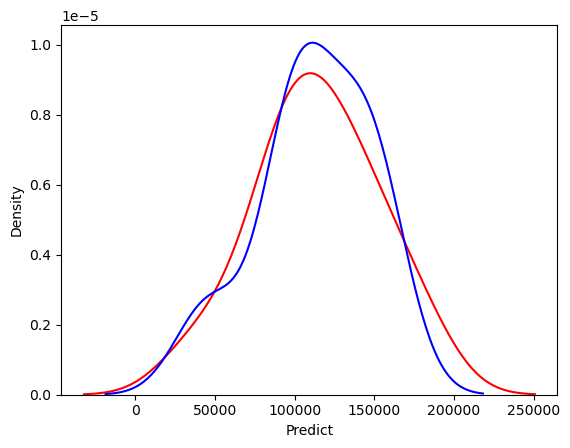

In [19]:
sns.distplot(com["Actual"],color='r',hist=False)
sns.distplot(com["Predict"],color='b',hist=False)

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test.values,y_pred))
print(mean_squared_error(y_test.values,y_pred))
print(mean_absolute_error(y_test.values,y_pred))

0.8701138132140062
182749993.10047996
10522.619999999999


# random forest regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

In [22]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
#predicting results
r_pred=dtr.predict(x_test)

In [24]:
arr=np.concatenate((y_test.values.reshape(len(y_test),1),r_pred.reshape(len(r_pred),1)),axis=1)
arr

array([[134307.35, 144259.4 ],
       [ 81005.76,  96479.51],
       [ 99937.59,  97483.56],
       [ 64926.08,  49490.75],
       [125370.37, 124266.9 ],
       [ 35673.41,  42559.73],
       [105733.54, 108552.04],
       [107404.34, 101004.64],
       [ 97427.84, 101004.64],
       [122776.86, 144259.4 ],
       [141585.52, 144259.4 ],
       [166187.94, 156991.12],
       [ 89949.14,  96479.51],
       [152211.77, 124266.9 ],
       [182901.99, 156991.12]])

In [25]:
com=pd.DataFrame({"Actual":y_test.values,"Predict":r_pred})

In [26]:
com
y_test.shape

(15,)

C:\Users\91630\AppData\Local\Temp\ipykernel_1552\3655587692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(com["Actual"],color='r',hist=False)
C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

<Axes: xlabel='Predict', ylabel='Density'>

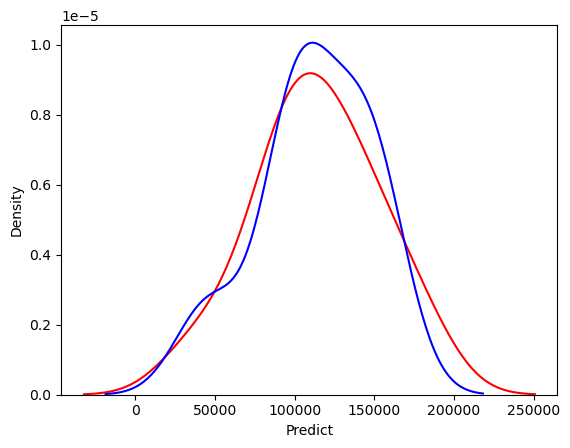

In [27]:
sns.distplot(com["Actual"],color='r',hist=False)
sns.distplot(com["Predict"],color='b',hist=False)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test.values,r_pred))
print(mean_squared_error(y_test.values,r_pred))
print(mean_absolute_error(y_test.values,r_pred))

0.8701138132140062
182749993.10047996
10522.619999999999


In [29]:
x_test.values

array([[ 91992.39, 135495.07, 252664.93],
       [ 38558.51,  82982.09, 174999.3 ],
       [ 61994.48, 115641.28,  91131.24],
       [  1000.23, 124153.04,   1903.93],
       [ 94657.16, 145077.58, 282574.31],
       [   542.05,  51743.15,      0.  ],
       [ 75328.87, 144135.98, 134050.07],
       [ 64664.71, 139553.16, 137962.62],
       [ 63408.86, 129219.61,  46085.25],
       [ 86419.7 , 153514.11,      0.  ],
       [ 93863.75, 127320.38, 249839.44],
       [142107.34,  91391.77, 366168.42],
       [ 44069.95,  51283.14, 197029.42],
       [120542.52, 148718.95, 311613.29],
       [144372.41, 118671.85, 383199.62]])

# polynomial regression

In [30]:
x=df.iloc[0:,0:3].values
y=df.iloc[0:,3].values.reshape(-1,1)

In [31]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [32]:
from sklearn.preprocessing import PolynomialFeatures
ply=PolynomialFeatures(degree=2)
x_poly=ply.fit_transform(x)

x_poly.shape

(50, 10)

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)
y_test

array([[134307.35],
       [ 81005.76],
       [ 99937.59],
       [ 64926.08],
       [125370.37],
       [ 35673.41],
       [105733.54],
       [107404.34],
       [ 97427.84],
       [122776.86],
       [141585.52],
       [166187.94],
       [ 89949.14],
       [152211.77],
       [182901.99]])

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
l_pred=lr.predict(x_test)
l_pred

array([[124540.89089729],
       [ 87443.41243641],
       [ 96140.24086088],
       [ 42537.4027093 ],
       [127685.77863558],
       [ 59173.70674904],
       [107180.73714328],
       [ 98974.80241499],
       [ 94329.56596161],
       [110773.68898435],
       [126438.54229891],
       [179139.27390247],
       [107589.9313833 ],
       [148190.15395772],
       [172486.75022875]])

In [37]:
y_test

array([[134307.35],
       [ 81005.76],
       [ 99937.59],
       [ 64926.08],
       [125370.37],
       [ 35673.41],
       [105733.54],
       [107404.34],
       [ 97427.84],
       [122776.86],
       [141585.52],
       [166187.94],
       [ 89949.14],
       [152211.77],
       [182901.99]])

In [38]:
com_lr=pd.DataFrame({"Actual":y_test.reshape(15,),"predict":l_pred.reshape(15,)})

In [39]:
com_lr

,Actual,predict
0,134307.35,124540.890897
1,81005.76,87443.412436
2,99937.59,96140.240861
3,64926.08,42537.402709
4,125370.37,127685.778636
5,35673.41,59173.706749
6,105733.54,107180.737143
7,107404.34,98974.802415
8,97427.84,94329.565962
9,122776.86,110773.688984


C:\Users\91630\AppData\Local\Temp\ipykernel_1552\3899175165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(com_lr["Actual"],color='r',hist=False)
C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91630\anaconda3\envs\tfnwe\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='predict', ylabel='Density'>

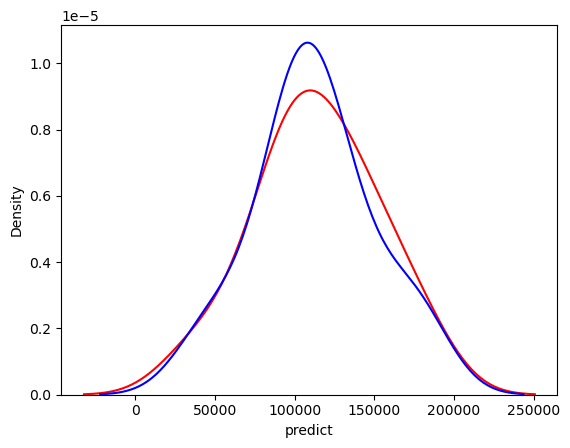

In [40]:
sns.distplot(com_lr["Actual"],color='r',hist=False)
sns.distplot(com_lr["predict"],color='b',hist=False)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,l_pred))
print(mean_squared_error(y_test,l_pred))
print(mean_absolute_error(y_test,l_pred))

0.8924441452988026
151331193.80081472
10223.998795754502
